### 순차 데이터
- 텍스트 데이터(ex: I am a boy) : 순서가 의미가 있다.
- 시게열 데이터(ex: 1일 10도, 2일 8도)

# RNN (Recurrent Neural Network, 순환신경망 )
- 순환데이터, 순환신경망 
- 텍스트 데이터(ex: I am a boy) : 순서가 의미가 있다. 
- 시계열 데이터(ex: 1일 10도, 2일 8도)


---

# 순환 신경망 (RNN : Recurrent Neural Network)

- IMDB - Internet Movie Database
- IMDB구성 : Train Data (25000개중 긍정 12500개, 부정 12500개) , Test Data (25000개중 긍정 12500개, 부정 12500개)
- NLP : Natural Language Processing(자연어 처리)
- 말뭉치 : 하나의 데이터셋을 말뭉치라고 표현
- 토큰 : 하나의 단어를 토큰이라고 표현 
- 어휘사전 : 번호로 구분된 유일한 단어들의 집단
- 머신러닝 이나 딥러닝 에서는 데이터가 숫자로 구성되어 있어야 함으로 이런 단어들을 고유한 번호로 할당하여 사용

In [2]:
from tensorflow.keras.datasets import imdb
(train_input, train_target) , (test_input, test_target) = imdb.load_data(num_words= 500) # 500개 단어
# 25000개 문장 중에서 500개 단어만 사용한다

17464789/17464789 [==============================] - 173s 10us/step


In [3]:
print(train_input.shape , test_input.shape)

(25000,) (25000,)


In [4]:
# train의 첫번째 문장의 Token 갯수
len(train_input[0])

218

In [5]:
len(train_input[1])

189

In [6]:
# 첫번쨰 댓글의 출력
print(train_input[0]) 
#단어 가 문자가 아니라 숫자로 되어있다.

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 샘플의 시작부분 토큰은 1을 사용한다. (1이 단어는 아니다. 시작이라는 표시)
- 2는 선정한 단어 갯수에 포함되지 않는 단어를 표현한다.
- train_input 자체는 numpy 배열이나 댓글에 사용된 토큰 수가 다르기 때문에 numpy 배열을 사용 못하고 python list를 사용한다.

In [7]:
# train의 target 출력
print(train_target[:10])
# 1 : 긍정 , 0 : 부정

[1 0 0 1 0 0 1 0 1 0]


In [8]:
# 훈련세트 준비
from sklearn.model_selection import train_test_split
train_input , val_input, train_target, val_target = train_test_split(train_input , train_target , test_size= 0.2, random_state=42)

In [9]:
# 각 리뷰마다 문장 길이를 시각화
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths) , np.median(lengths))

239.00925 178.0


> 오른쪽 쏠림 현상. 예상치 못하게 긴 댓글들이 있다

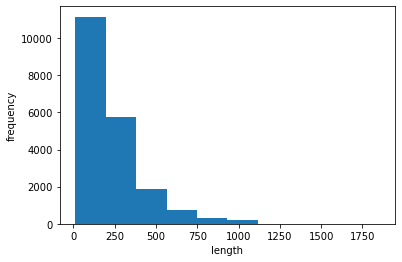

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

---
### Sequence Padding
- 전체 자릿수를 100으로 가정했을 경우 한문장에 3개 토큰만 있을 경우 나머지 97개는 비워지고 이를 0으로 채우는 과정

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input , maxlen = 100) # 위의 차트에서 100개 부분이 제일 많은것 같아 100개의 토큰만 사용
val_seq = pad_sequences(val_input, maxlen = 100) # 검증 데이터

In [12]:
# 크기 확인
print(train_seq.shape)

(20000, 100)


> 25000개의 훈련 세트중 500개는 검증세트로 빠짐

In [13]:
# 첫번째 댓글 확인
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
# 원본의 첫번째 댓글의 마지막 10개만 출력
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [42]:
print(train_seq[5])
print(train_seq[3])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]
[  7  58   4  20  16   2   5   2  45   2   4   2  78   2   2  15 297   2
   2   2 247  74 149  14  20  13 144  28  69   6   2   2   4   2 354  71
   2   2  34   2   2  14  20  69   2   2   8   4   2   2  15   9   2  34
   2  54  36 297   2   2   2 190  88  45   2   2   4 283   2   7   4   2
 100  24  30   2   8  22   4 116   9   2  19   4   2   7   2   2   5   2
   2   2   2   2  11   4  22  16 340   2]


---
# 순환 신경망 모델 만들기

In [16]:
from tensorflow import keras

In [30]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN( 8, input_shape = [100, 500]) ) # 8 : cell 갯수  # 500 : One Hot Encoding 
model.add(keras.layers.Dense(1 , activation = "sigmoid")) # sigmoid 는 0,1 일경우 1개만 가지고도 할 수 있다 (... ?)

In [31]:
# One Hot Encoding
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [32]:
# One hot encoding 확인하기 (1이 하나밖에 없는지)
print(np.sum(train_oh[0][0]))

1.0


In [33]:
val_oh = keras.utils.to_categorical(val_seq)
val_oh.shape

(5000, 100, 500)

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 8)                 4072      
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


500 * 8 + (8 * 8)(cell 8개가 8번씩 반복한다) + 8(절편) = 4072
> cell 8 : 단어를 8개 썻을 것이다 라고 추측. cell 갯수 : token 갯수

In [35]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4 ) # learning rate : optimizer , 1e-4 : 0.0001
model.compile(
    optimizer = rmsprop,
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best_simplernn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)
history = model.fit(
    train_oh,
    train_target,
    epochs = 100 , # RNN에서는 제일 작은게 100이다.
    batch_size = 64, # mini_batch 경사 하강법 / (8*8)에서 나왔다. / all batch: 4072 
    validation_data = (val_oh , val_target),
    callbacks = [checkpoint_cb , early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 17s 51ms/step - loss: 0.7009 - accuracy: 0.5012 - val_loss: 0.6982 - val_accuracy: 0.5068
Epoch 2/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6953 - accuracy: 0.5131 - val_loss: 0.6950 - val_accuracy: 0.5074
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6920 - accuracy: 0.5233 - val_loss: 0.6931 - val_accuracy: 0.5190
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6896 - accuracy: 0.5350 - val_loss: 0.6919 - val_accuracy: 0.5232
Epoch 5/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6875 - accuracy: 0.5441 - val_loss: 0.6909 - val_accuracy: 0.5302
Epoch 6/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6852 - accuracy: 0.5543 - val_loss: 0.6891 - val_accuracy: 0.5418
Epoch 7/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6799 - accuracy: 0.5714 - val_loss: 0.6776 - val_ac

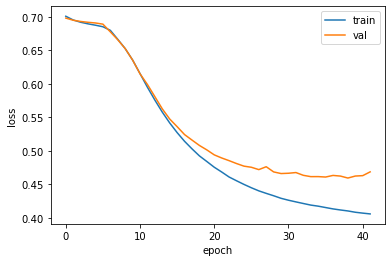

In [38]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

In [39]:
model.evaluate(val_oh , val_target)

157/157 [==============================] - 2s 15ms/step - loss: 0.4593 - accuracy: 0.7856


[0.45929545164108276, 0.7856000065803528]

---
### LSTM (Long Short Term Memory)
- 순환신경망의 셀로 이전 타임스텝의 샘플을 기억하고 있음

문장 기억?

한 데이터가 들어가서 나온 값의 순서를 기억한다. 
ex 첫번째 셀에 데이터가 들어가서 0.7이 나왔다. 두번째 데이터가 들어가서 0.5가 나왔다. LSTM은 0.7 뒤에 0.5가 나올 수 있구나를 기억하는 것. 

In [40]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500 , 16, input_length = 100 )) # one-hot encoding , 16: hyperparameter
model.add(keras.layers.LSTM(8)) # 8개의 Cell을 사용한다.
model.add(keras.layers.Dense(1 , activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4 ) # learning rate : optimizer , 1e-4 : 0.0001
model.compile(
    optimizer = rmsprop,
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best_lstm_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)
history = model.fit(
    train_seq, # Embedding에서 원핫인코딩 해주기 때문
    train_target,
    epochs = 100 , # RNN에서는 제일 작은게 100이다.
    batch_size = 64, # mini_batch 경사 하강법 / (8*8)에서 나왔다. / all batch: 4072 
    validation_data = (val_seq , val_target),
    callbacks = [checkpoint_cb , early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 15s 39ms/step - loss: 0.6918 - accuracy: 0.5595 - val_loss: 0.6906 - val_accuracy: 0.5918
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6873 - accuracy: 0.6320 - val_loss: 0.6840 - val_accuracy: 0.6256
Epoch 3/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6701 - accuracy: 0.6187 - val_loss: 0.6501 - val_accuracy: 0.6112
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6108 - accuracy: 0.7043 - val_loss: 0.5927 - val_accuracy: 0.7366
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5740 - accuracy: 0.7510 - val_loss: 0.5675 - val_accuracy: 0.7470
Epoch 6/100
313/313 [==============================] - 10s 31ms/step - loss: 0.5513 - accuracy: 0.7601 - val_loss: 0.5502 - val_accuracy: 0.7596
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.5331 - accuracy: 0.7685 - val_loss: 0.5312 - val_ac

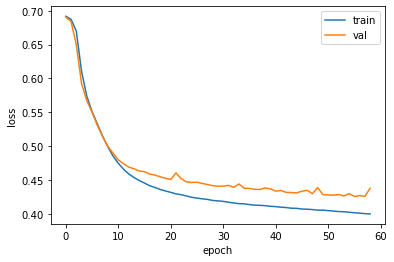

In [43]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

In [ ]:
model.evaluate(val_seq , val_target)

---
# 순환층에 드롭아웃 적용하기

In [44]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500 , 16, input_length = 100 )) # one-hot encoding , 16: hyperparameter
model.add(keras.layers.LSTM(8 , dropout = 0.3 )) # 8개의 Cell을 사용한다. / 0.3 문장을 덜 가져오는 것 
model.add(keras.layers.Dense(1 , activation = 'sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4 ) # learning rate : optimizer , 1e-4 : 0.0001
model.compile(
    optimizer = rmsprop,
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best_dropout_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)
history = model.fit(
    train_seq, # Embedding에서 원핫인코딩 해주기 때문
    train_target,
    epochs = 100 , # RNN에서는 제일 작은게 100이다.
    batch_size = 64, # mini_batch 경사 하강법 / (8*8)에서 나왔다. / all batch: 4072 
    validation_data = (val_seq , val_target),
    callbacks = [checkpoint_cb , early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 15s 40ms/step - loss: 0.6921 - accuracy: 0.5507 - val_loss: 0.6912 - val_accuracy: 0.5970
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6896 - accuracy: 0.6069 - val_loss: 0.6875 - val_accuracy: 0.6388
Epoch 3/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6827 - accuracy: 0.6471 - val_loss: 0.6748 - val_accuracy: 0.6810
Epoch 4/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6436 - accuracy: 0.6908 - val_loss: 0.6070 - val_accuracy: 0.7138
Epoch 5/100
313/313 [==============================] - 10s 33ms/step - loss: 0.5930 - accuracy: 0.7171 - val_loss: 0.5782 - val_accuracy: 0.7310
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.5701 - accuracy: 0.7329 - val_loss: 0.5588 - val_accuracy: 0.7402
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 0.5486 - accuracy: 0.7477 - val_loss: 0.5400 - val_ac

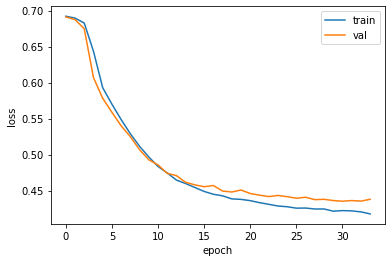

In [46]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

In [47]:
model.evaluate(val_seq , val_target)

157/157 [==============================] - 1s 6ms/step - loss: 0.4353 - accuracy: 0.7996


[0.4352770447731018, 0.7996000051498413]

---
# 2개 층을 연결하기

In [49]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500 , 16, input_length = 100 )) # one-hot encoding , 16: hyperparameter
model.add(keras.layers.LSTM(8 , dropout = 0.3 , return_sequences = True) ) # 8개의 Cell을 사용한다. / 0.3 문장을 덜 가져오는 것 
model.add(keras.layers.LSTM(8 , dropout = 0.3 )) # return_sequences 옵션을 주어야 위에서 만들어진 데이터가 문장으로 두번째 LSTM에 들어온다.
# 모든 타입스템의 은닉상태를 출력하려면 return_sequences = True 하여야 한다. 
model.add(keras.layers.Dense(1 , activation = 'sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4 ) # learning rate : optimizer , 1e-4 : 0.0001
model.compile(
    optimizer = rmsprop,
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best_2rnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)
history = model.fit(
    train_seq, # Embedding에서 원핫인코딩 해주기 때문
    train_target,
    epochs = 100 , # RNN에서는 제일 작은게 100이다.
    batch_size = 64, # mini_batch 경사 하강법 / (8*8)에서 나왔다. / all batch: 4072 
    validation_data = (val_seq , val_target),
    callbacks = [checkpoint_cb , early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 25s 67ms/step - loss: 0.6929 - accuracy: 0.5106 - val_loss: 0.6924 - val_accuracy: 0.5310
Epoch 2/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6908 - accuracy: 0.5889 - val_loss: 0.6886 - val_accuracy: 0.5860
Epoch 3/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6750 - accuracy: 0.6212 - val_loss: 0.6477 - val_accuracy: 0.6714
Epoch 4/100
313/313 [==============================] - 20s 65ms/step - loss: 0.6177 - accuracy: 0.6988 - val_loss: 0.5992 - val_accuracy: 0.7236
Epoch 5/100
313/313 [==============================] - 21s 66ms/step - loss: 0.5854 - accuracy: 0.7272 - val_loss: 0.5727 - val_accuracy: 0.7354
Epoch 6/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5645 - accuracy: 0.7351 - val_loss: 0.5497 - val_accuracy: 0.7474
Epoch 7/100
313/313 [==============================] - 21s 68ms/step - loss: 0.5402 - accuracy: 0.7521 - val_loss: 0.5304 - val_ac

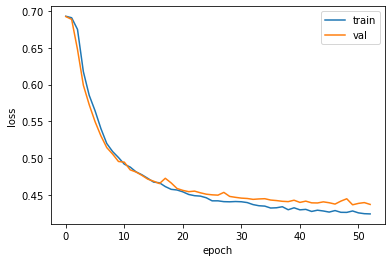

In [52]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

In [53]:
model.evaluate(val_seq , val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

---
### GRU(Gated Recurrent Unit) 신경망
- LSTM의 간소화 버전
    
LSTM은 첫번째 셀이 모든 토큰을 기억하는데 , GRU는 그 기억하는 갯수를 지정해준다. LSTM의 단점 개선           
~ 자동 Dropout 이다 ~  ex) 최근 5년치만 기억한다

In [51]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500 , 16, input_length = 100 )) # one-hot encoding , 16: hyperparameter
model.add(keras.layers.GRU(8)) 
model.add(keras.layers.Dense(1 , activation = 'sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [54]:
# 훈련하기
rmsprop = keras.optimizers.RMSprop(learning_rate= 1e-4 ) # learning rate : optimizer , 1e-4 : 0.0001
model.compile(
    optimizer = rmsprop,
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )
checkpoint_cb = keras.callbacks.ModelCheckpoint('../Data/best_gru_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)
history = model.fit(
    train_seq, # Embedding에서 원핫인코딩 해주기 때문
    train_target,
    epochs = 100 , # RNN에서는 제일 작은게 100이다.
    batch_size = 64, # mini_batch 경사 하강법 / (8*8)에서 나왔다. / all batch: 4072 
    validation_data = (val_seq , val_target),
    callbacks = [checkpoint_cb , early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 14s 38ms/step - loss: 0.6925 - accuracy: 0.5283 - val_loss: 0.6918 - val_accuracy: 0.5660
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6906 - accuracy: 0.5752 - val_loss: 0.6895 - val_accuracy: 0.5974
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6872 - accuracy: 0.6041 - val_loss: 0.6853 - val_accuracy: 0.6074
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6811 - accuracy: 0.6238 - val_loss: 0.6782 - val_accuracy: 0.6216
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6708 - accuracy: 0.6363 - val_loss: 0.6662 - val_accuracy: 0.6294
Epoch 6/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6544 - accuracy: 0.6526 - val_loss: 0.6478 - val_accuracy: 0.6510
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6261 - accuracy: 0.6737 - val_loss: 0.6126 - val_ac

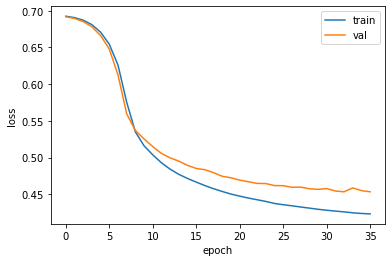

In [55]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train' , 'val'])
plt.show()

In [56]:
model.evaluate(val_seq , val_target)

157/157 [==============================] - 1s 6ms/step - loss: 0.4534 - accuracy: 0.7904


[0.45336484909057617, 0.7904000282287598]

---